# 5G-Slicer Demo
Initially, we import the 5G-Slicer's SDK (`SlicerSDK`) and the respective use-case (`BusExperiment`) from the usecases package.

In [1]:
from usecases.dublin_buses_experiment import BusExperiment
from SlicerSDK import SlicerSDK

## Use-case Object Instatiation
Then, we create the experiment object (`bus_experiment`), which retrieves the Dublin's buses and bus stops data, performs an initial analysis, and creates the creates `slicerSDK` object. 
The new object includes every information that needed to deploy the experiment.

In [2]:
bus_experiment = BusExperiment(
    SlicerSDK("http://controller:5000", "docker-compose-demo.yaml"), # initial SlicerSDK model
    num_of_RUs=100, # number of radio units
    num_of_clouds=1, # number of cloud servers
    num_of_edge=4, # number of MEC servers
    num_of_buses=7, # number of IoT devices
    max_num_of_trace_steps=50, # trajectories information
    min_num_of_trace_steps=1, 
    bus_ids=[331416615, 335096213, 360603795, 380192314, 430355076, 335862098, 335096213], # IoT ids
    bounding_box=( 
        (53.351627215495036, -6.294565200805664), # bounding box in which the devices will operate
        (53.36187249371434, -6.234655380249024)),
    seed=1) # Random seed to keep the same EDGE nodes during the experiment
slicerSDK = bus_experiment.generate_experiment()  # creation of the experimental data

MEC_full='EDGE_8220DB000010_1'
MEC_empty='EDGE_8220DB000798_1'
bus='bus_331416615_1'

/home/jovyan/work/usecases/dublin_buses_experiment.py:47: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  self.fill_trace_dataframe()


## Deployment
5G-Slicer provides the `deploy` and `undeploy` functions with which the user can deploy and undeploy his/her description.
The system performs the emulation with the help of Fogify, which is a Fog Computing emulation framework (https://github.com/UCY-LINC-LAB/fogify)

In [3]:
slicerSDK.deploy()

Deploy process: 100%|██████████| 11/11 [00:05<00:00,  2.10it/s]
 * Tip: There are .env or .flaskenv files present. Do "pip install python-dotenv" to use them.


 * Serving Flask app 'utils.server' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


## Data Analysis

`SlicerSDK` gives users the opportunity to retrieve their data as pandas dataframes and perform analysis on them.

In [6]:
df_bus = slicerSDK.get_metrics_from(bus)

### Raw Tables

In [7]:
df_bus

,cpu_util,cpu,memory,memory_util,disk_bytes,network_rx_dublin_network,network_tx_dublin_network,count
timestamp,,,,,,,,
2022-04-21 08:24:06,85.501313,1.188927e+09,15654912.0,5.831909,53248.0,25866.0,3834.0,4
2022-04-21 08:24:14,6.598823,1.340904e+09,15802368.0,5.886841,53248.0,43068.0,66889.0,5
2022-04-21 08:24:21,5.506050,1.455396e+09,15802368.0,5.886841,53248.0,54713.0,114009.0,6
2022-04-21 08:24:25,10.697130,1.604813e+09,15806464.0,5.888367,53248.0,69703.0,174560.0,7
2022-04-21 08:24:34,9.159410,1.894795e+09,15802368.0,5.886841,53248.0,99860.0,296060.0,8


### Summarized Statistics

In [8]:
df_bus.describe()

,cpu_util,cpu,memory,memory_util,disk_bytes,network_rx_dublin_network,network_tx_dublin_network,count
count,5.000000,5.000000e+00,5.000000e+00,5.000000,5.0,5.000000,5.000000,5.000000
mean,23.492545,1.496967e+09,1.577370e+07,5.876160,53248.0,58642.000000,131070.400000,6.000000
std,34.724489,2.696622e+08,6.642596e+04,0.024746,0.0,28078.113977,111481.341911,1.581139
min,5.506050,1.188927e+09,1.565491e+07,5.831909,53248.0,25866.000000,3834.000000,4.000000
25%,6.598823,1.340904e+09,1.580237e+07,5.886841,53248.0,43068.000000,66889.000000,5.000000
50%,9.159410,1.455396e+09,1.580237e+07,5.886841,53248.0,54713.000000,114009.000000,6.000000
75%,10.697130,1.604813e+09,1.580237e+07,5.886841,53248.0,69703.000000,174560.000000,7.000000
max,85.501313,1.894795e+09,1.580646e+07,5.888367,53248.0,99860.000000,296060.000000,8.000000


### Plots

<AxesSubplot:xlabel='timestamp'>

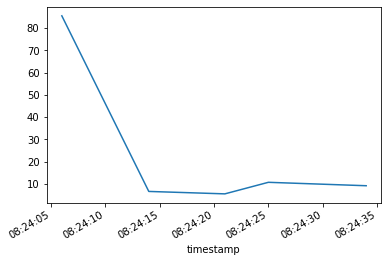

In [9]:
df_bus.cpu_util.plot()

### Analysis via the Interactive Map
The 5G-Slicer framework provides an interactive map, and users can change the locations of the mobile nodes at runtime on the map without needing redeployment.
Moreover, a user can move a mobile node on map and this action will be performed in the emulated environment and also there will be an update at the infrastructure meterics 

In [10]:
slicerSDK.generate_map('dublin_network')

Map(center=[53.35663304618565, -6.2651331442033085], controls=(ZoomControl(options=['position', 'zoom_in_text'…

<AxesSubplot:xlabel='timestamp'>

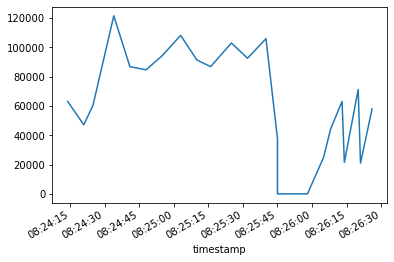

In [12]:
df_bus = slicerSDK.get_metrics_from(bus)
df_bus.network_tx_dublin_network.diff().plot()

## Profiling of MECs and Energy Modeling

Users also have the opportunity to perform analysis of node profiles and energy consumption models.

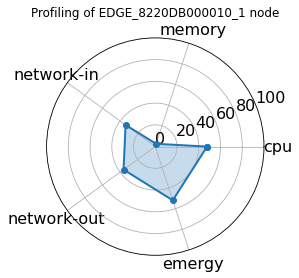

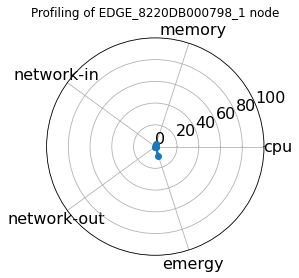

In [13]:
energy_model = '4*cpu + 0.5*memory + 1*network_in_ptc + 1*network_out_ptc + 0.5'
max_energy_consumption = 6

slicerSDK.profile(MEC_full, 'dublin_network', 
        energy_model=energy_model, 
        max_energy_consumption=max_energy_consumption, last=5)

slicerSDK.profile(MEC_empty, 'dublin_network', 
        energy_model=energy_model, 
        max_energy_consumption=max_energy_consumption, last=5)

## Mobility Evaluation
Users can execute auto-generated mobility scenarios 

In [14]:
start, end = slicerSDK.scenario_execution('mobility_scenario')

100%|██████████| 215/215 [03:55<00:00,  1.09s/it]


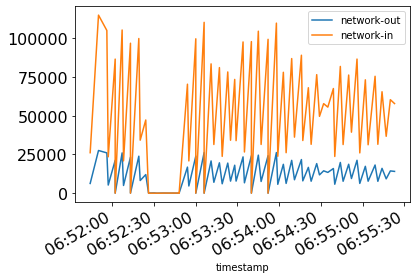

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
fig, ax = plt.subplots()

data = slicerSDK.get_metrics_from(MEC_full)
data = data[data.index>start]
data = data[data.index<end]

data['network_tx_dublin_network'].diff().plot(ax=ax,label="network-out")
data['network_rx_dublin_network'].diff().plot(ax=ax,label="network-in")
ax.legend()

<AxesSubplot:xlabel='timestamp'>

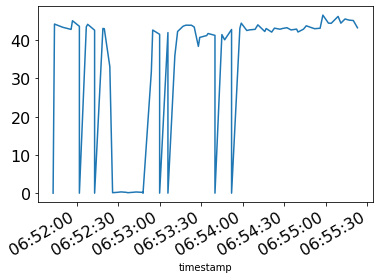

In [15]:
data.cpu_util.plot()

<AxesSubplot:xlabel='cpu_util', ylabel='network-edge'>

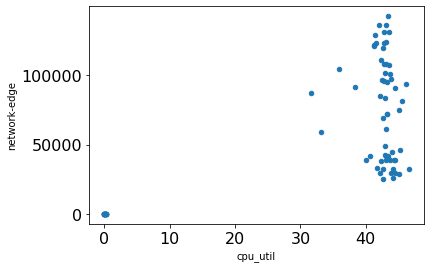

In [16]:
data['network-edge'] = data['network_tx_dublin_network'].diff() + data['network_rx_dublin_network'].diff()
data.plot.scatter('cpu_util', 'network-edge')

## Undeploy
Via `undeploy` function the user can undeploy his/her emulation.

slicerSDK.undeploy()

In [17]:
slicerSDK.undeploy()

Undeploy process: 100%|██████████| 11/11 [00:15<00:00,  1.38s/it]
